In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import math

In [2]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Breast Cancer.csv')
print (df.describe())

            Column1     Column2     Column3     Column4     Column5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

          Column6     Column8     Column9    Column10    Column11  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

In [3]:
df.rename(columns = {"Column1": "ID", 
                     "Column2":"Clump Thickness",
                    "Column3": "Uniform Cell Size",
                    "Column4": "Uniform Cell Shape",
                    "Column5": "Marginal Adhesion",
                    "Column6": "Single Epithelial Cell Size",
                    "Column7": "Bare Nuclei",
                    "Column8": "Bland Chromatin",
                    "Column9": "Normal Nucleoli",
                    "Column10": "Mitoses",
                    "Column11":"Class"}, 
                                 inplace = True) 

In [52]:
print (df.dtypes)

ID                              int64
Clump Thickness                 int64
Uniform Cell Size               int64
Uniform Cell Shape              int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


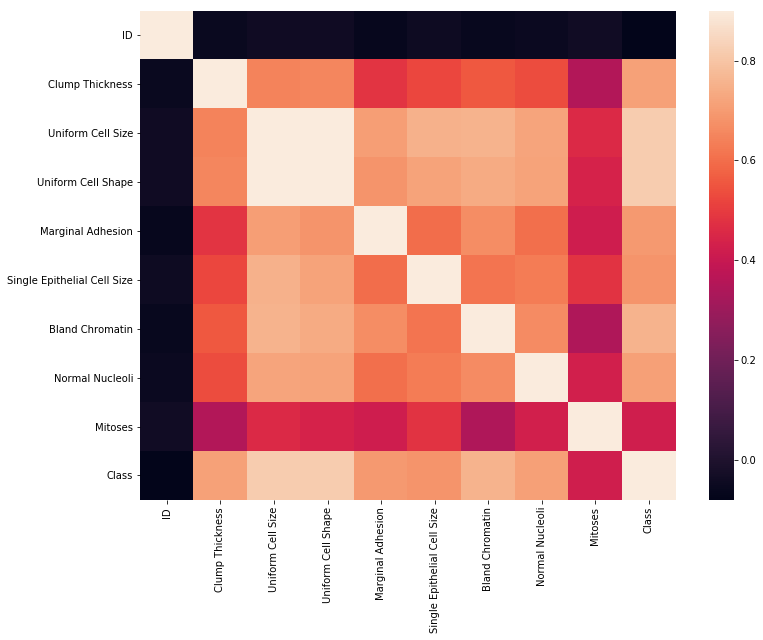

In [4]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeRegressor

RandForest= ensemble.RandomForestRegressor()

RandForest.fit(data,target)

RandForest.feature_importances_
RandForest_ft_series = pd.Series(data=RandForest.feature_importances_, index=data.columns)
###################################
sorted_series = RandForest_ft_series.sort_values(ascending = False)
sorted_series

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Uniform Cell Size              0.614498
Uniform Cell Shape             0.118825
Bland Chromatin                0.106173
Clump Thickness                0.065027
Normal Nucleoli                0.039907
Single Epithelial Cell Size    0.026742
Marginal Adhesion              0.021817
Mitoses                        0.007011
dtype: float64

# Most important feature is uniform cell size by far

In [16]:
from sklearn.model_selection import cross_val_score

In [22]:
#Linear Regression

data = df[['Clump Thickness', 'Uniform Cell Size', 'Uniform Cell Shape', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli']]
target = df['Class'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state =20)

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train , y_train)
y_pred = regr.predict(data)

cvscore_regr=cross_val_score(regr, data, target, cv=10)

print (regr.coef_)
print (regr.intercept_)
print('Rsquared for regr:', regr.score(x_train, y_train))
print('CV:', cvscore_regr)
print ('CVmean:', np.mean(cvscore_regr))
print ('CVstd:', np.std(cvscore_regr))
# plt.scatter(x,y)

# plt.plot(x, regr.predict(x))
# plt.show()


# Calculate linear regression for x and bin_y.
#fit = np.polyfit(x,bin_y,1)

# Work as a function to return the predicted value of y.
#fit_fn = np.poly1d(fit)

# Add a little 'noise' to the data for graphing purposes.
#jitter = np.random.randn(700)

# Display our results.
#plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
#plt.xlabel('Continuous x')
#plt.ylabel('Binary y')
#plt.show()

[[0.07633498 0.0541616  0.07261996 0.03849737 0.08497522 0.0340651 ]]
[1.43545954]
Rsquared for regr: 0.7758449399305118
CV: [0.61578481 0.74177531 0.79020765 0.70582365 0.65725144 0.81291849
 0.77015508 0.86965046 0.8478015  0.86286754]
CVmean: 0.7674235923537271
CVstd: 0.0825841743875411


In [23]:

#Lasso Regression
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(data, target)
cvscore_lass=cross_val_score(lass, data, target, cv=10)

print('Rsquared for lasso:', lass.score(data,target))
print('CV:', cvscore_lass)
print ('CVmean:', np.mean(cvscore_lass))
print ('CVstd:', np.std(cvscore_lass))




Rsquared for lasso: 0.7537152713404419
CV: [0.55344968 0.6865192  0.79283573 0.69456773 0.60341736 0.7868541
 0.75443567 0.79820677 0.81309959 0.86033802]
CVmean: 0.734372385185006
CVstd: 0.09299008212709207


#Linear Regression better than lasso with higher Rsquared and lower variance in cross val scores

In [24]:
ridge = linear_model.Ridge(alpha = 10, fit_intercept = False)
ridge.fit(data, target)
cvscore_ridge=cross_val_score(ridge, data, target, cv=10)

print('Rsquared for ridge:', ridge.score(data,target))
print('CV:', cvscore_ridge)
print ('CVmean:', np.mean(cvscore_ridge))
print ('CVstd:', np.std(cvscore_ridge))


Rsquared for ridge: 0.3125817648856166
CV: [ 0.23862542  0.36384408  0.25024577  0.3506602   0.18654045  0.13420869
  0.08578873  0.25821896  0.47876156 -0.04964351]
CVmean: 0.22972503487856977
CVstd: 0.1434215378791581


#Ridge regression performs terribly! Linear is the best of the three